In [1]:
import joblib
import pandas as pd
from pathlib import Path
import json
import numpy as np

### Visualize a strategie's most likely response per group

In [2]:
input_path = Path("../_2022_09_20_14_24_20_947002/87000/agent.joblib")

In [3]:
with open(input_path, "rb") as input_file:
    e = joblib.load(input_file)

In [4]:
e.keys()

dict_keys(['regret', 'timestep', 'strategy', 'pre_flop_strategy'])

In [5]:
e["timestep"]

55000

In [17]:
e["strategy"].keys()

In [12]:
def df_key(agent,key):
    df=pd.DataFrame(index=agent[key].keys(), data=agent[key].values())
    i=pd.DataFrame([json.loads(x) for x in df.index])
    df.reset_index(drop=True, inplace=True)
    df= pd.concat([df,i], axis=1)
    i=df.pop("history").apply(lambda x:  pd.Series(x))
    i.fillna({}, inplace=True)
    i=pd.concat([pd.json_normalize(i[n]) for n in i.columns], axis=1)
    i.fillna("", inplace=True)
    df=df.join(i)

    return df


In [7]:
def vis_key(agent,key):
    df=df_key(agent,key)
    means=df.groupby("cards_cluster")[["fold","call"
    ,"raise"]].mean()
    means.plot.line()


In [8]:
#df_preflop=df_key(e,"pre_flop_strategy")
#df_preflop

In [ ]:
df_strategy=df_key(e,"strategy")
df_strategy

In [9]:
preflop_strat=df_strategy[df_strategy.pre_flop==""].groupby("cards_cluster")[["fold","call","raise"]].mean()
preflop_strat.plot.line() 

NameError: name 'df_strategy' is not defined

In [13]:
#strategy after initial raise for each cluster
df_strategy_afer_raise=df_strategy[df_strategy.turn.astype(str).str.contains("raise")]
means=df_strategy_afer_raise.groupby("cards_cluster")[["fold","call","raise"]].mean()
means.plot.line() 

NameError: name 'df_strategy' is not defined

In [14]:
means=df_strategy.groupby("cards_cluster")[["fold","call","raise"]].mean()
means.plot.line() 

NameError: name 'df_strategy' is not defined

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


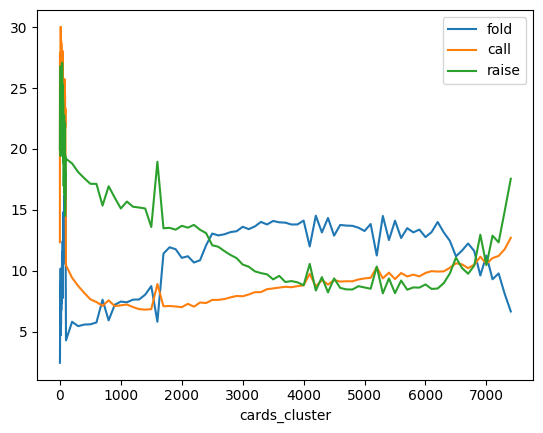

In [16]:
vis_key(e,"strategy")

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


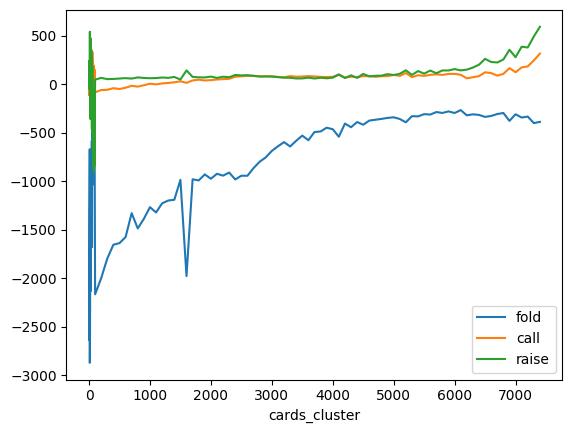

In [15]:
vis_key(e,"regret")